# Nettoyage des données Camp_Market

Ce notebook présente les étapes de nettoyage du fichier Camp_Market.csv.


In [1]:

import pandas as pd

df = pd.read_csv('Camp_Market.csv', sep=';')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
            'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

cat_cols = ['Education', 'Marital_Status']
for c in cat_cols:
    df[c] = df[c].astype('category')

print(df.dtypes)


ID                              int64
Year_Birth                      int64
Education                    category
Marital_Status               category
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [3]:

ndf = df.drop_duplicates()

print('Valeurs manquantes par colonne :')
print(ndf.isna().sum())

ndf.head()


Valeurs manquantes par colonne :
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
ndf.to_csv('Camp_Market_cleaned.csv', index=False)

# Explications du nettoyage des données

Dans ce notebook, nous avons réalisé plusieurs étapes de nettoyage et de préparation des données afin de garantir la qualité et la fiabilité de l'analyse ultérieure :

- **Chargement des données** : Lecture du fichier CSV avec délimiteur adapté.
- **Suppression des doublons** : Retrait des lignes identiques pour éviter les biais.
- **Gestion des valeurs manquantes** : Suppression des enregistrements contenant des données absentes, pour éviter les erreurs d’analyse.
- **Conversion des types de données** : 
  - Dates converties au format datetime pour pouvoir manipuler des dates correctement.
  - Colonnes numériques converties en types numériques pour effectuer des calculs précis.
  - Colonnes catégorielles converties en type 'category' pour une meilleure gestion mémoire et performance.
- **Sauvegarde des données propres** : Export des données nettoyées dans un nouveau fichier CSV pour utilisation future.

Ces étapes sont essentielles car elles permettent d’assurer l’intégrité des données, faciliter leur manipulation, et préparer le dataset pour des analyses statistiques ou de machine learning plus robustes.


# Préparation et Ingénierie des Caractéristiques
Pour analyser et segmenter les clients de manière efficace, nous allons enrichir notre jeu de données. Cette étape consiste à créer de nouvelles caractéristiques (ou "features") à partir des données existantes, ce qui nous permettra de mieux comprendre les comportements des clients et l'efficacité des campagnes. Nous utiliserons le fichier Camp_Market_cleaned.csv comme base.

## 1. Ingénierie des Caractéristiques Démographiques et de Clientèle
Dans cette section, nous calculons l'âge des clients et leur ancienneté avec l'entreprise. Ces informations sont cruciales pour évaluer si l'âge ou la durée de la relation client influencent les habitudes de dépense et les réponses aux campagnes.

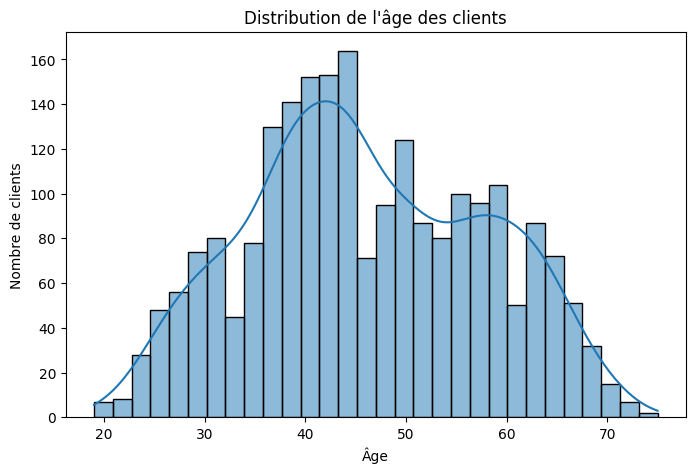

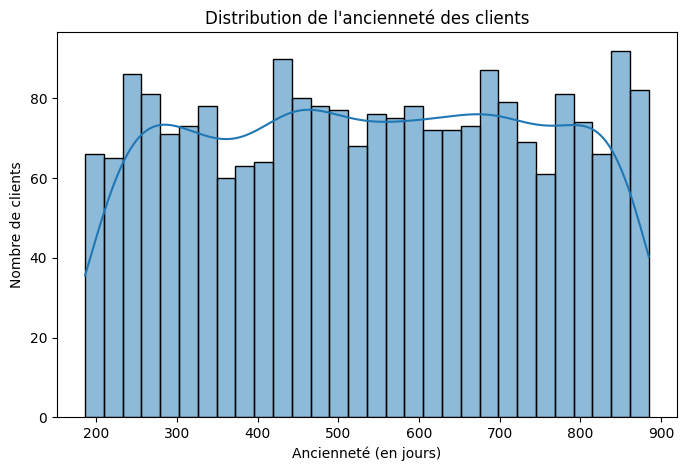

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Camp_Market_cleaned.csv')

df['Age'] = 2015 - df['Year_Birth']
df = df[df['Age'] < 100]  # Suppression des âges anormaux

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Tenure_Days'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Tenure_Days', bins=30, kde=True)
plt.title("Distribution de l'ancienneté des clients")
plt.xlabel("Ancienneté (en jours)")
plt.ylabel("Nombre de clients")
plt.show()

## 2. Ingénierie des Caractéristiques de Dépenses et d'Achats

Ici, nous consolidons les données de dépenses et d'achats pour obtenir des indicateurs globaux. Cela simplifie l'analyse et nous donne un aperçu rapide du comportement de consommation de chaque client.

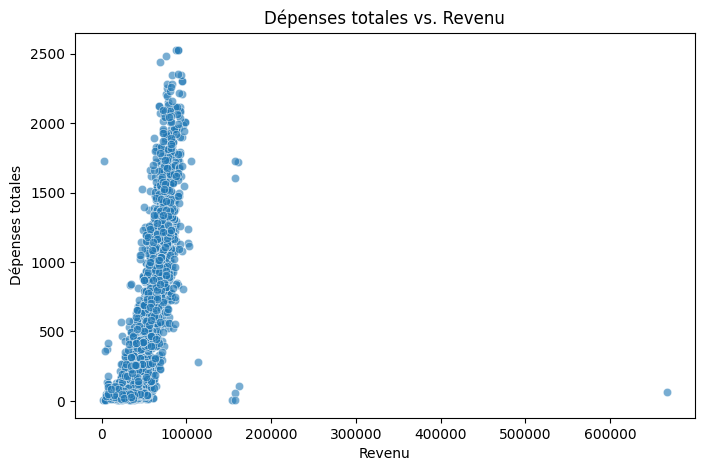

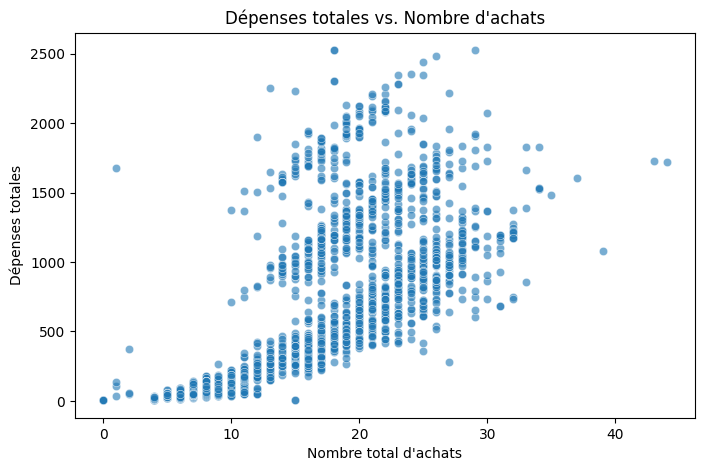

In [4]:
# Charger le jeu de données nettoyé
df = pd.read_csv('Camp_Market_cleaned.csv')

# Calcul des dépenses totales
spending_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# Calcul du nombre total d'achats
purchase_cols = [
    'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumDealsPurchases'
]
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

# Visualisation de la relation entre le revenu et les dépenses totales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Income', y='Total_Spending', alpha=0.6)
plt.title("Dépenses totales vs. Revenu")
plt.xlabel("Revenu")
plt.ylabel("Dépenses totales")
plt.show()

# Visualisation de la relation entre le nombre d'achats et les dépenses totales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Total_Purchases', y='Total_Spending', alpha=0.6)
plt.title("Dépenses totales vs. Nombre d'achats")
plt.xlabel("Nombre total d'achats")
plt.ylabel("Dépenses totales")
plt.show()

## 3. Ingénierie des Caractéristiques Familiales
Nous combinons le nombre d'enfants et d'adolescents pour obtenir un indicateur unique du nombre de personnes à charge. Ce chiffre peut avoir une influence significative sur le pouvoir d'achat et le type de produits consommés.

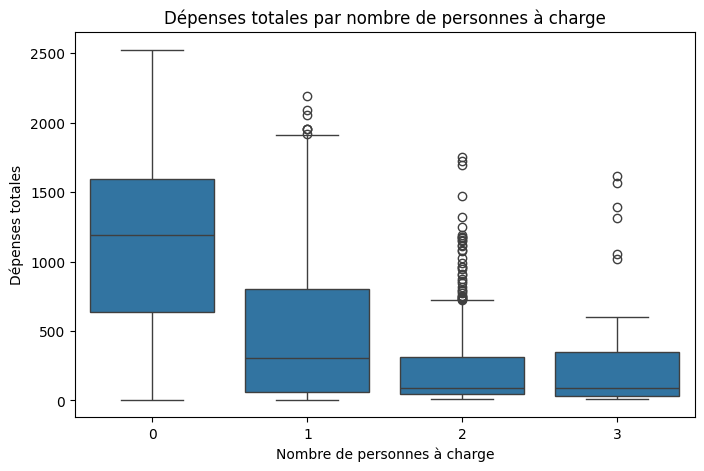

In [7]:
df = pd.read_csv('Camp_Market_cleaned.csv')  

spending_cols = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds'
]
df['Total_Spending'] = df[spending_cols].sum(axis=1)
df['Dependents'] = df['Kidhome'] + df['Teenhome']

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Dependents', y='Total_Spending')
plt.title("Dépenses totales par nombre de personnes à charge")
plt.xlabel("Nombre de personnes à charge")
plt.ylabel("Dépenses totales")
plt.show()

## 4. Évaluation de l'efficacité des campagnes

Maintenant que vos données sont prêtes, nous pouvons commencer l'analyse. L'évaluation de l'efficacité des campagnes passées est la première étape. L'objectif est de mesurer le taux de succès de chaque campagne en calculant le pourcentage de clients qui ont accepté l'offre. La visualisation de ces taux vous donnera un aperçu rapide des campagnes les plus performantes.

Taux d'acceptation de chaque campagne :
Response        14.910714
AcceptedCmp4     7.455357
AcceptedCmp3     7.276786
AcceptedCmp5     7.276786
AcceptedCmp1     6.428571
AcceptedCmp2     1.339286
dtype: float64


/var/folders/9y/hlyw969519722zx5yt0_vwvm0000gn/T/ipykernel_32131/1447328179.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_acceptance_rates.index, y=campaign_acceptance_rates.values, palette='viridis')


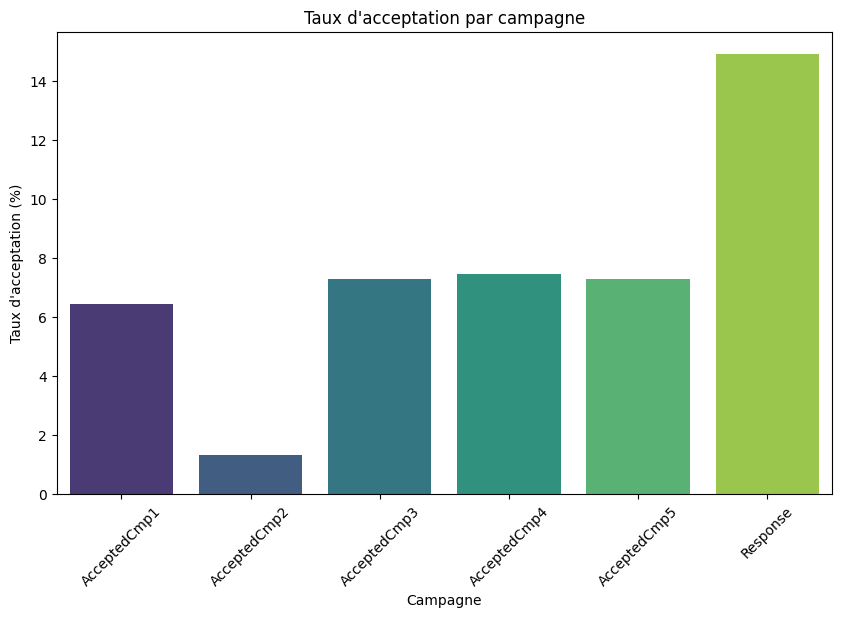

In [9]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

campaign_acceptance_rates = df[campaign_cols].mean() * 100

print("Taux d'acceptation de chaque campagne :")
print(campaign_acceptance_rates.sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_acceptance_rates.index, y=campaign_acceptance_rates.values, palette='viridis')
plt.title("Taux d'acceptation par campagne")
plt.xlabel('Campagne')
plt.ylabel("Taux d'acceptation (%)")
plt.xticks(rotation=45)
plt.show()

# Segmentation des clients

L'objectif est de regrouper les clients en segments distincts en fonction de leurs caractéristiques et comportements. Cela nous permettra de comprendre les différents profils de notre clientèle et de personnaliser les futures stratégies de marketing.

## 5. Préparation des données pour le clustering

Avant de segmenter, il est essentiel de normaliser les données numériques. Les algorithmes de clustering comme K-Means sont sensibles à l'échelle des variables. Normaliser les données garantit que chaque caractéristique a un poids égal dans le processus de clustering.

## 6. Détermination du nombre de clusters
Nous utiliserons la méthode du coude ("Elbow Method") pour déterminer le nombre optimal de clusters. Cette méthode consiste à tracer le "within-cluster sum of squares" (WSS) pour différents nombres de clusters et à identifier le point du graphique où la distorsion diminue de manière moins significative, formant un "coude".

## 7. Création et profilage des clusters

Une fois le nombre optimal de clusters déterminé, nous appliquerons l'algorithme K-Means pour assigner chaque client à un cluster. Ensuite, nous analyserons les caractéristiques moyennes de chaque cluster pour créer des profils de clients détaillés. Par exemple, un cluster pourrait être composé de "gros dépensiers" tandis qu'un autre pourrait être des "clients sensibles aux promotions".

/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/clus

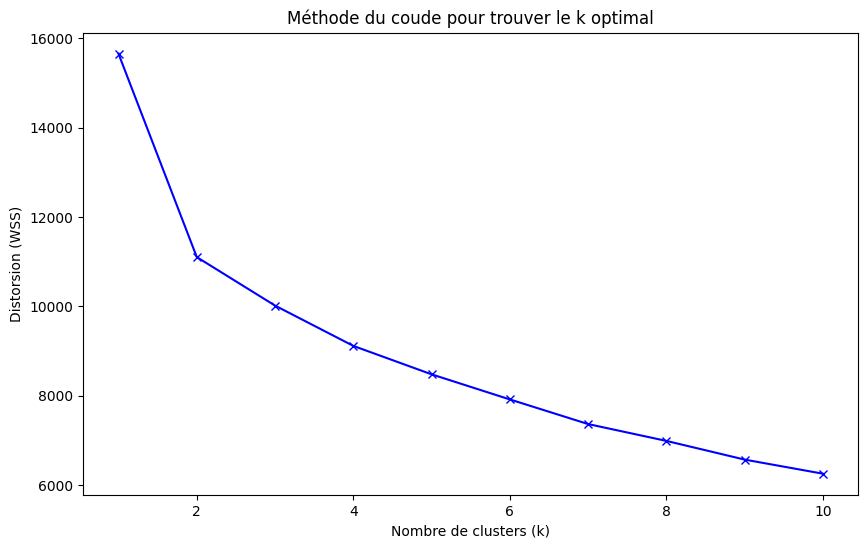


Profils des clients par cluster (valeurs moyennes) :
               Income  Total_Spending  Total_Purchases    Recency        Age  \
Cluster                                                                        
0        43253.377660      138.398734         9.556962  50.995781  51.575949   
1        78983.003924     1415.929550        20.170254  49.579256  46.219178   
2        31035.331551      109.784615         7.941538  48.567692  37.983077   
3        59498.517455      821.506645        22.038206  47.792359  50.445183   

         Dependents  Tenure_Days  Customer_Count  
Cluster                                           
0          1.879747   463.301688             474  
1          0.088063   523.422701             511  
2          0.812308   529.393846             650  
3          1.101329   625.134551             602  


/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/matkoeogen/Desktop/epitech_rush4/.venv/lib/python3.9/site-packages/sklearn/clus

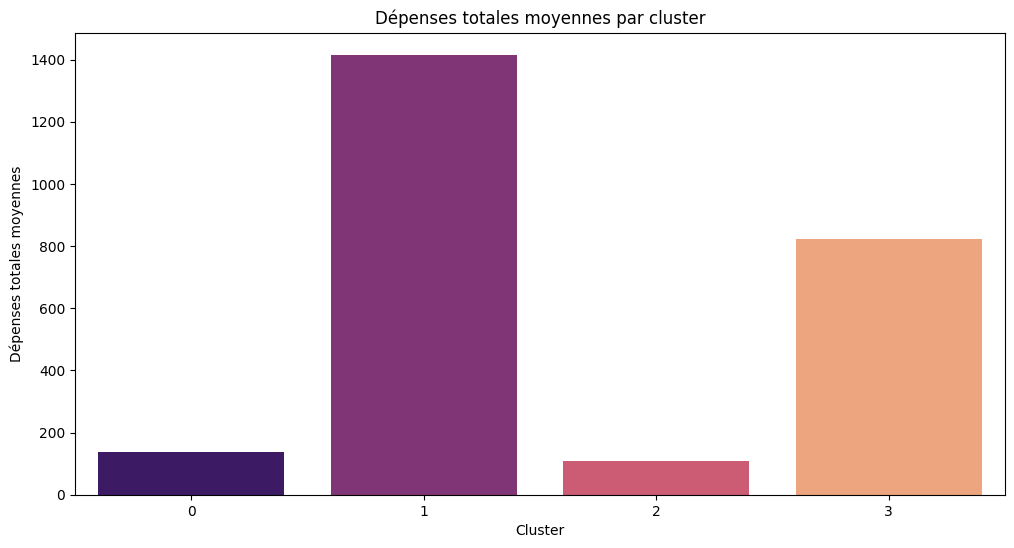

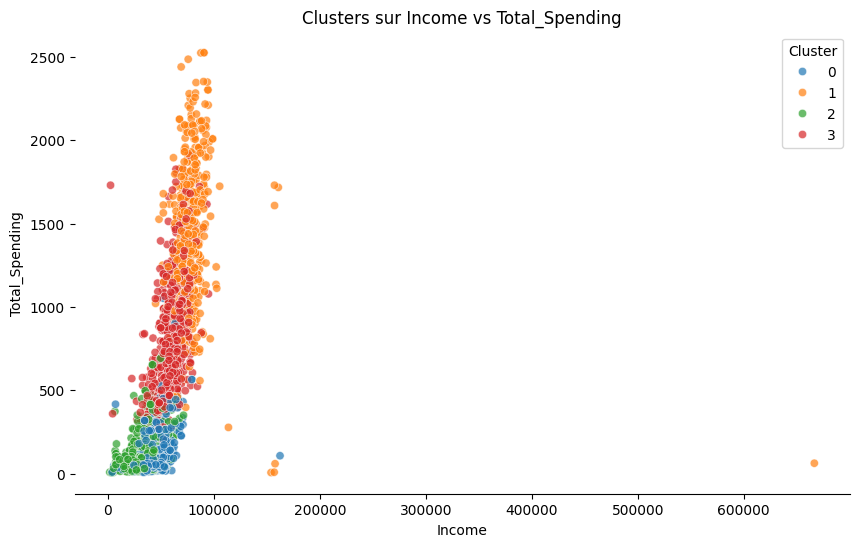

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1) Load data (comma-separated CSV)
df = pd.read_csv('Camp_Market_cleaned.csv')  # default sep=','

# 2) Feature engineering (recreate everything needed)
# Handle missing income
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Parse date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Age and tenure
df['Age'] = 2015 - df['Year_Birth']
df = df[df['Age'] < 100].copy()  # drop obvious outliers
df['Tenure_Days'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days

# Totals
spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

purchase_cols = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

# Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# 3) Select features and scale
clustering_features = ['Income', 'Total_Spending', 'Total_Purchases', 'Recency', 'Age', 'Dependents', 'Tenure_Days']

# Safety check: ensure all columns exist
missing = [c for c in clustering_features if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns before scaling: {missing}")

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[clustering_features])

# 4) Elbow method
distortions = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    distortions.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Distorsion (WSS)')
plt.title('Méthode Elbow pour trouver le k optimal')
plt.show()

# 5) Fit final model (adjust optimal_k based on the elbow)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# 6) Profile clusters
cluster_profiles = df.groupby('Cluster')[clustering_features].mean().sort_index()
# Add counts aligned to clusters
counts = df['Cluster'].value_counts().sort_index()
cluster_profiles['Customer_Count'] = counts.reindex(cluster_profiles.index, fill_value=0)

print("\nProfils des clients par cluster (valeurs moyennes) :")
print(cluster_profiles)

# 7) Visualize a metric per cluster (bar)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=cluster_profiles.reset_index(),
    x='Cluster', y='Total_Spending', palette='magma'
)
plt.title('Dépenses totales moyennes par cluster')
plt.xlabel('Cluster')
plt.ylabel('Dépenses totales moyennes')
plt.show()

# 8) Optional: visualize clusters in 2D (Income vs Total_Spending)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='Income', y='Total_Spending',
    hue='Cluster', palette='tab10', alpha=0.7
)
sns.despine(left=True)
plt.title('Clusters sur Income vs Total_Spending')
plt.show()